In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


D:\Program Files\WinPyth\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
import os
from numpy import loadtxt
from numpy import append
import codecs

In [6]:
indir = './SDSS/Composites'
spektra={}
for root, dirs, filenames in os.walk(indir):
    i=0
    for f in filenames:
        filecp = codecs.open(os.path.join(root, f), encoding = 'cp1252')
        content = loadtxt(filecp, comments="#", delimiter="\t", unpack=False)
        array=content[:,[0, 4]]
        spektra[i]=array
        i+=1
        del content
        del array
print(spektra)

{0: array([[  1.00100000e+03,   2.96700000e-01],
       [  1.00300000e+03,   2.97100000e-01],
       [  1.00500000e+03,   2.97500000e-01],
       ..., 
       [  1.49950000e+04,   5.93500000e-01],
       [  1.49970000e+04,   5.93500000e-01],
       [  1.49990000e+04,   5.93500000e-01]]), 1: array([[  1.00100000e+03,   8.65100000e-02],
       [  1.00300000e+03,   8.70500000e-02],
       [  1.00500000e+03,   8.76000000e-02],
       ..., 
       [  1.49950000e+04,   5.56900000e-01],
       [  1.49970000e+04,   5.56900000e-01],
       [  1.49990000e+04,   5.56900000e-01]]), 2: array([[  1.00100000e+03,   8.60600000e-01],
       [  1.00300000e+03,   8.63700000e-01],
       [  1.00500000e+03,   8.66700000e-01],
       ..., 
       [  1.49950000e+04,   4.56500000e-01],
       [  1.49970000e+04,   4.56600000e-01],
       [  1.49990000e+04,   4.56600000e-01]]), 3: array([[  1.00100000e+03,   2.36700000e-01],
       [  1.00300000e+03,   2.37400000e-01],
       [  1.00500000e+03,   2.38000000e-01

In [7]:
# Save
numpy.save('./PCAfeldolgozas/kompozitok.npy', spektra) 

# Load
# read_dictionary = numpy.load('./obj/probe.npy').item()
# print(read_dictionary)

In [8]:
sajatsp=numpy.load('./PCAfeldolgozas/eig5.npy')
sajatsp=sajatsp.T
sajatsp.shape

(5062, 5)

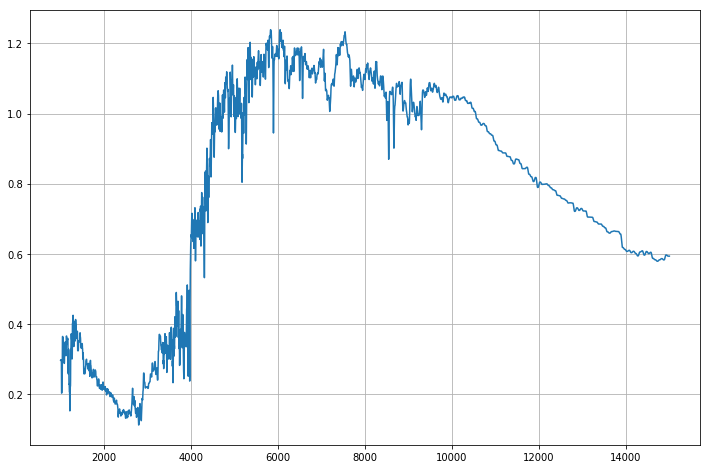

In [9]:
figsize(12,8)
temp=spektra[0]
plot(temp[:,0],temp[:,1])
grid(True)
del temp

Lenormálom a bemeneti spektrumot

In [10]:
for j in range (0,i):
    temp=spektra[j]
    m1=0
    m2=0
    m3=0
    m4=0
    n=0
    for k in temp[:,0]:
        if(k>4250 and k<4300):
            if(m1==0):
                normalashoz1=temp[n,1]
                m1+=1
            else:
                normalashoz1=numpy.append(normalashoz1,temp[n,1])
                
        if(k>4600 and k<4800):
            if(m2==0):
                normalashoz2=temp[n,1]
                m2+=1
            else:
                normalashoz2=numpy.append(normalashoz2,temp[n,1])
                
        if(k>5400 and k<5500):
            if(m3==0):
                normalashoz3=temp[n,1]
                m3+=1
            else:
                normalashoz3=numpy.append(normalashoz3,temp[n,1])
                
        if(k>5600 and k<5800):
            if(m4==0):
                normalashoz4=temp[n,1]
                m4+=1
            else:
                normalashoz4=numpy.append(normalashoz4,temp[n,1])
                
        n+=1
        
    med1=numpy.median(normalashoz1)
    med2=numpy.median(normalashoz2)
    med3=numpy.median(normalashoz3)
    med4=numpy.median(normalashoz4)
    avgmed=(med1+med2+med3+med4)/4
        
    temp[:,1]=temp[:,1]/avgmed
    spektra[j]=temp

Most pedig újramintavételezem

In [11]:
def interpol(x1,x2,y1,y2,xk):
    a=(y2-y1)/(x2-x1)
    b=y1-x1*(y2-y1)/(x2-x1)
    
    yx=a*xk+b
    
    return(yx)

In [12]:
mintapontok=linspace(3724,6760.6,5062)
nullak=linspace(0,0,5062)

In [13]:
umspektra={}
for j in range (0,i):
    umspektrum=numpy.vstack((mintapontok,nullak)).T
    temp=spektra[j]
    v=0
    w=0
    for q in range (0,5062):
        xk=mintapontok[q]
        while(temp[w,0]<6760.6):
            if(xk>temp[w,0] and xk<temp[w+1,0]):
                yk=interpol(temp[w,0],temp[w+1,0],temp[w,1],temp[w+1,1],xk)
                umspektrum[v,0]=xk
                umspektrum[v,1]=yk
                v+=1
                break
            if(xk==temp[w,0]):
                umspektrum[v,0]=xk
                umspektrum[v,1]=temp[w,1]
                v+=1
                break
            if(xk==temp[w+1,0]):
                umspektrum[v,0]=xk
                umspektrum[v,1]=temp[w+1,1]
                v+=1
                break
            w+=1
    del temp
    umspektra[j]=umspektrum
    del umspektrum
del spektra

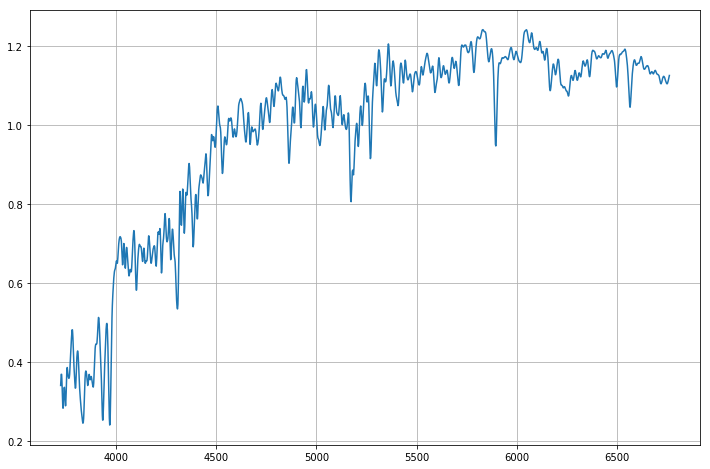

In [14]:
temp=umspektra[0]
plot(temp[:,0],temp[:,1])
grid(True)
del temp

Most le kell vonni belőle az átlagot, majd el kell végezni a kifejtést

In [15]:
atlag=numpy.load('./PCAfeldolgozas/atlagspektrum.npy')
print(atlag)

[[  3.72400000e+03   6.15582083e-01]
 [  3.72460000e+03   6.36738653e-01]
 [  3.72520000e+03   6.59424473e-01]
 ..., 
 [  6.75940000e+03   9.34486216e-01]
 [  6.76000000e+03   9.35306610e-01]
 [  6.76060000e+03   9.35850054e-01]]


(3700, 6500)

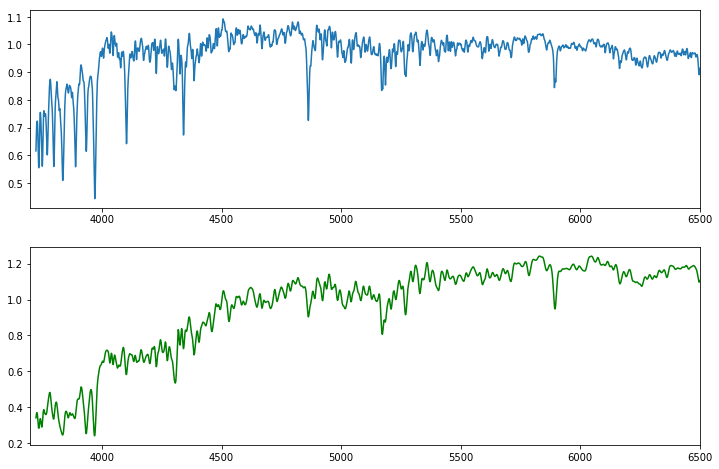

In [16]:
temp=umspektra[0]
figure(1)
plt.subplot(211)
plot(atlag[:,0],atlag[:,1])
xlim(3700,6500)
plt.subplot(212)
plot(temp[:,0],temp[:,1],'g')
xlim(3700,6500)

In [17]:
red_umspektra={}
for j in range (0,i):
    temp=umspektra[j]
    for k in range (0,5062):
        temp[k,1]=temp[k,1]-atlag[k,1]
    red_umspektra[j]=temp
    del temp
del umspektra

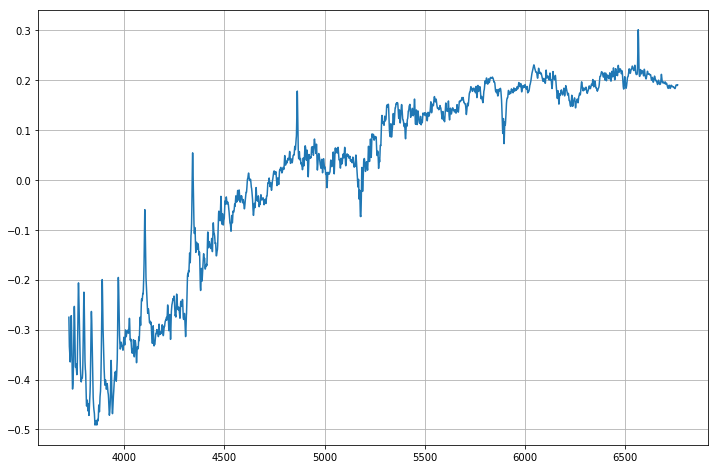

In [18]:
temp=red_umspektra[0]
plot(temp[:,0],temp[:,1])
grid(True)
del temp

Most meg kell oladni a kifejétst, ehhez a túlhatározott egyenletrendszert kellett megoldani

In [19]:
Trafomtx=numpy.dot(sajatsp.T,sajatsp)
print(Trafomtx)

[[  1.00000000e+00   4.23272528e-16  -2.67147415e-16   3.43475248e-16
    1.86916455e-16]
 [  4.23272528e-16   1.00000000e+00  -3.57353036e-16  -5.68121938e-16
   -2.46764414e-16]
 [ -2.67147415e-16  -3.57353036e-16   1.00000000e+00   7.27716498e-16
   -3.43692089e-16]
 [  3.43475248e-16  -5.68121938e-16   7.27716498e-16   1.00000000e+00
   -4.85288892e-16]
 [  1.86916455e-16  -2.46764414e-16  -3.43692089e-16  -4.85288892e-16
    1.00000000e+00]]


In [20]:
Kifejteseh={}
for j in range (0,i):
    temp=red_umspektra[j]
    A=numpy.dot(inv(Trafomtx),sajatsp.T)
    PCs=numpy.dot(A,temp[:,1])
    Kifejteseh[j]=PCs
    del PCs
    del temp
    del A
print(Kifejteseh)

{0: array([ 13.86989461,   1.09785998,  -1.73498783,   0.3425022 ,  -0.3448985 ]), 1: array([ 10.19119761,   0.94634556,  -0.95852918,   0.29326505,  -0.09559382]), 2: array([ 4.12253303,  0.12038983, -0.30948506,  0.19632031, -0.00472334]), 3: array([ 11.84605386,   1.02109105,  -1.46549116,   0.32191367,  -0.28860301]), 4: array([-17.80442374,  -1.56899892,  -0.96451234,   0.04465679,  -0.32675877]), 5: array([-10.58171898,  -0.13668217,  -0.50995102,   0.48807907,  -0.21459047]), 6: array([-5.04675543, -0.07268696, -0.17492058,  0.27558104, -0.1481804 ]), 7: array([ 0.46326594, -0.62667658, -0.02975643,  0.19068733, -0.07408319]), 8: array([ 6.67738799, -1.71017418,  0.30072594,  0.26639931, -0.00703476]), 9: array([ 13.83391253,   1.05254223,  -1.68798028,   0.298627  ,  -0.35732391]), 10: array([ 10.20522234,   0.87241847,  -0.93228246,   0.25570445,  -0.12234906]), 11: array([ 5.08771044,  0.26921235, -0.38013374,  0.15486745,  0.01325653]), 12: array([ 12.10531303,   0.97789576,

In [21]:
Components=numpy.load('./PCAfeldolgozas/PCs.npy')
Components=Components.T
print(Components)

[[ -3.13380973  -0.3989089    0.12805532  -0.14087223  -0.11144051]
 [ -7.59014489  -1.800435    -0.38871227   0.22064907  -0.24254127]
 [ 12.01722363   0.34333498  -0.54036624   0.11323224  -0.11219087]
 ..., 
 [ 18.15471346  -2.61802496   0.03777897   0.08239351  -0.61619396]
 [ -0.59259861   1.27076527   0.43329841  -0.37692142  -0.03463735]
 [ -1.69457836   0.39427457   0.97469403   0.3511541    0.34295578]]


In [22]:
elso2=Components[:,0:2]
print(elso2)

[[ -3.13380973  -0.3989089 ]
 [ -7.59014489  -1.800435  ]
 [ 12.01722363   0.34333498]
 ..., 
 [ 18.15471346  -2.61802496]
 [ -0.59259861   1.27076527]
 [ -1.69457836   0.39427457]]


In [23]:
template2=numpy.empty((i,2))
for j in range (0,i):
    temp=Kifejteseh[j]
    template2[j,0]=temp[0]
    template2[j,1]=temp[1]
    del temp
print(template2)

[[ 13.86989461   1.09785998]
 [ 10.19119761   0.94634556]
 [  4.12253303   0.12038983]
 [ 11.84605386   1.02109105]
 [-17.80442374  -1.56899892]
 [-10.58171898  -0.13668217]
 [ -5.04675543  -0.07268696]
 [  0.46326594  -0.62667658]
 [  6.67738799  -1.71017418]
 [ 13.83391253   1.05254223]
 [ 10.20522234   0.87241847]
 [  5.08771044   0.26921235]
 [ 12.10531303   0.97789576]
 [ 13.43021395  -0.77065355]
 [  7.96700925  -0.59156199]
 [  3.02856832  -0.25197277]
 [  6.57385766  -0.40928298]
 [ 15.01494824   0.3234428 ]
 [ 11.04861723   0.78771489]
 [  4.82023981   0.90436197]
 [ 13.56270131   0.46807091]
 [ 12.83850277   1.98054363]
 [  8.74642475   2.79235323]
 [  4.36733868   3.4782855 ]
 [ 12.07235697   2.02142513]
 [  9.86924095   0.93324651]
 [ 12.00644118   1.44230656]
 [ 13.65838604   1.31021467]
 [ 15.16339262   0.66474024]
 [ 17.33160505  -0.58781597]
 [ 13.25813185   0.04671142]
 [  9.50240403   0.08542803]
 [  4.94076637   0.16619681]
 [  9.0617379    0.01853196]
 [ 10.10333548

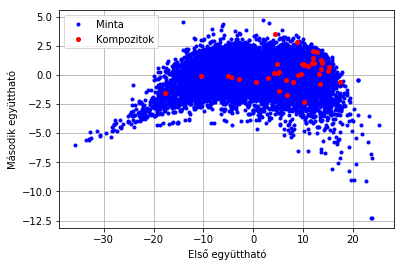

In [36]:
figsize(6,4)
plot(elso2[:,0],elso2[:,1],'bo',ms=3,label='Minta')
plot(template2[:,0],template2[:,1],'ro',ms=4,label='Kompozitok')
grid(True)
plt.legend()
xlabel('Első együttható')
ylabel('Második együttható')
savefig('tempkif.pdf', bbox_inches='tight')